# 도시/지방/주간/야간 이라면 도시주간보다는 지방야간이 규모가 큰 사고가 잦다  

In [1]:
#-*- coding: utf-8 -*-

# 공통
import numpy as np
import os
import pandas as pd
import seaborn as sns

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "traffic_accident_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 데이터셋 저장 경로
ACCIDENT_PATH = "../9th_week/교통사망사고정보"
SUPPLEMENT_PATH = "../9th_week/보조데이터/03.서울시 도로 링크별 교통 사고발생 수"                

In [2]:
def load_accident_data(accident_path=ACCIDENT_PATH):
    csv_path = os.path.join(accident_path, "Kor_Train_교통사망사고정보(12.1~17.6).csv")
    return pd.read_csv(csv_path, encoding='euc-kr')    

train = load_accident_data()

In [3]:
train["사고피해정도"] = train.사망자수*4 + train.중상자수*3 + train.경상자수*2 + train.부상신고자수*1
train["사고차량타입"] = train.당사자종별_1당_대분류 + train.당사자종별_2당_대분류

In [4]:
def isUrban(x):
    if x in ('서울', '부산', '인천', '대전', '대구'):
        return 1
    else:
        return 0

In [5]:
#train['도시여부'] = train['발생지시도'].apply(isUrban)
train['도시여부'] = train['발생지시도'].apply(lambda x: 1 if x=='서울' else 0)

In [6]:
top5percent = train.nlargest(1250, '사고피해정도')

In [7]:
train_rural_day = top5percent[(top5percent.주야 == '주간') & (top5percent.도시여부 == 0)]

In [8]:
train_rural_day.sort_values(by="사고피해정도", ascending=False).head(10)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,사고피해정도,사고차량타입,도시여부
7972,2015,2015073117,50,주간,금,2,60,54,4,0,경남,거제시,차량단독,공작물충돌,공작물충돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승합차,대형,없음,없음,1097971,1656401,128.572280,34.897637,178,승합차없음,0
24329,2012,2012022415,45,주간,금,4,100,6,23,67,강원,고성군,차대차,추돌,진행중 추돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승합차,대형,승합차,중형,1086749,2023375,128.490833,38.206491,147,승합차승합차,0
5962,2016,2016010109,45,주간,금,1,67,4,62,0,전남,곡성군,차대차,추돌,진행중 추돌,운전자법규위반,안전거리 미확보,단일로,기타단일로,승합차,대형,승합차,대형,973572,1692938,127.220318,35.227824,140,승합차승합차,0
2564,2016,2016110609,30,주간,일,4,44,22,17,1,대전,대덕구,차대차,기타,기타,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,중형,승합차,대형,992831,1823258,127.420045,36.406800,117,승용차승합차,0
16738,2013,2013090509,19,주간,목,1,47,28,11,7,인천,부평구,차대차,추돌,주정차중 추돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승합차,대형,화물차,소형,934111,1941810,126.754838,37.473166,117,승합차화물차,0
3891,2016,2016071717,55,주간,일,4,43,13,26,0,강원,평창군,차대차,추돌,진행중 추돌,운전자법규위반,안전운전 의무 불이행,단일로,터널안,승합차,대형,승용차,중형,1078903,1953071,128.393537,37.573637,107,승합차승용차,0
15216,2013,2013121806,41,주간,수,4,36,25,7,0,강원,강릉시,차대차,추돌,주정차중 추돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승합차,대형,승합차,대형,1127916,1966566,128.950816,37.689729,105,승합차승합차,0
15746,2013,2013111011,30,주간,일,1,43,14,28,0,충남,천안시,차대차,추돌,진행중 추돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승합차,대형,승합차,대형,970483,1866208,127.169152,36.793562,102,승합차승합차,0
9931,2015,2015021109,39,주간,수,1,37,18,18,0,인천,서구,차대차,추돌,진행중 추돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,중형,승용차,중형,919715,1950208,126.591128,37.547715,94,승용차승용차,0
1289,2017,2017022217,30,주간,수,1,43,1,41,0,충북,단양군,차량단독,기타,기타,운전자법규위반,과속,단일로,기타단일로,승합차,승합차,없음,없음,1070623,1889487,128.293736,37.001219,89,승합차없음,0


### 실험1. 도시== 서울 & 규모가 큰 사고==사고피해정도 상위5%이상

도시여부에 상관없이 규모가 큰 사고는 주간에 더 많이 발생한다<br>
처음에 가정했던 규모가 큰 사고가 도시 주간보단 지방야간에서 더 자주 발생하는 건 맞다<br>

__그러나 상위5프로 규모의 사고 / 서울여부로 보았을때 정확한 결론은
도시야간 보다 지방주간 이 22배 정도 규모가 큰 사고가 많이 난다__

### 실험2. 도시== 서울 & 규모가 큰 사고==사고피해정도 상위1%이상

__도시낮보다 지방낮이 규모가 큰 사고가 30배 정도 많이 발생한다<br>
도시에선 사고피해정도 평균값이 주야간 모두 지방보다 높으나 피해정도가 큰 사고는 지방에서 더 많이 자주 발생한다__

### 실험3.  도시== 5대도시 & 규모가 큰 사고==사고피해정도 상위5%이상

지방에선 주간에 1.4배 더 많이, 도시에선 야간에 조금 더 많이<br>
처음에 가정했던 규모가 큰 사고가 도시 주간보단 지방 야간에서 더 자주 발생하는 건 맞다<br>

__그러나 상위5프로 규모의 사고 / 5대도시여부로 보았을때 확연히 차이나는 부분은<br>
도시주간보다 지방 주간이 6배 정도 사고가 많이 난다__

In [9]:
top5percent.groupby(["도시여부","주야"])['사고피해정도'].describe()

count       mean        std   min   25%   50%   75%    max
도시여부 주야                                                            
0    야간  497.0  18.674044  10.765761  12.0  13.0  16.0  20.0  160.0
     주간  688.0  21.273256  16.261806  12.0  14.0  16.0  22.0  178.0
1    야간   31.0  24.032258  19.415602  12.0  14.0  17.0  27.0  116.0
     주간   34.0  20.529412  14.179018  12.0  14.0  16.0  19.0   72.0

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


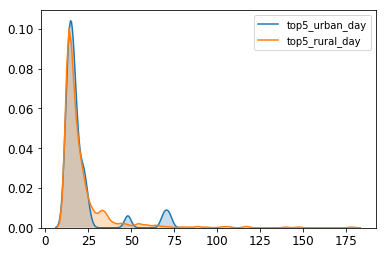

In [10]:
#sns.kdeplot(top5percent[(top5percent.도시여부 == 1)&(top5percent.주야 == "야간")].사고피해정도, label = "top5_urban_night", shade = True)
sns.kdeplot(top5percent[(top5percent.도시여부 == 1)&(top5percent.주야 == "주간")].사고피해정도, label = "top5_urban_day", shade = True)
#sns.kdeplot(top5percent[(top5percent.도시여부 == 0)&(top5percent.주야 == "야간")].사고피해정도, label = "top5_rural_night", shade = True)
sns.kdeplot(top5percent[(top5percent.도시여부 == 0)&(top5percent.주야 == "주간")].사고피해정도, label = "top5_rural_day", shade = True)

In [11]:
top1percent = train.nlargest(250, '사고피해정도')

In [12]:
top1percent.groupby(["도시여부","주야"])['사고피해정도'].describe()

count       mean        std   min   25%   50%   75%    max
도시여부 주야                                                            
0    야간   85.0  34.270588  18.695166  23.0  25.0  28.0  36.0  160.0
     주간  151.0  41.357616  25.742661  23.0  26.0  33.0  45.0  178.0
1    야간    9.0  43.777778  27.657629  26.0  33.0  36.0  39.0  116.0
     주간    5.0  47.400000  23.287336  23.0  25.0  48.0  69.0   72.0

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


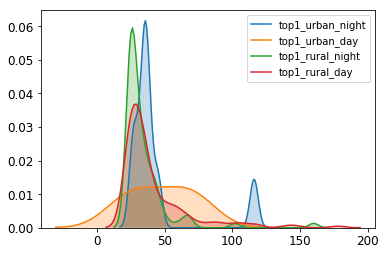

In [13]:
sns.kdeplot(top1percent[(top1percent.도시여부 == 1)&(top1percent.주야 == "야간")].사고피해정도, label = "top1_urban_night", shade = True)
sns.kdeplot(top1percent[(top1percent.도시여부 == 1)&(top1percent.주야 == "주간")].사고피해정도, label = "top1_urban_day", shade = True)
sns.kdeplot(top1percent[(top1percent.도시여부 == 0)&(top1percent.주야 == "야간")].사고피해정도, label = "top1_rural_night", shade = True)
sns.kdeplot(top1percent[(top1percent.도시여부 == 0)&(top1percent.주야 == "주간")].사고피해정도, label = "top1_rural_day", shade = True)

- 사고피해정도가 큰 규모의 교통사고들은 지방 주간에서 뚜렷하게 높은 발생빈도를 보인다 원인이 무엇일까?

__실험1 데이터에서  지방, 주간, 피해규모가 큰 10개 사고들을 살펴보면<br>
단일로-기타단일로에서 주로 발생(고속도로) 고속도로에서 승합차가 포함된 추돌 사고이다보니 피해정도가 큰 사고가 된다__

- 구글지도

  [https://www.google.com/maps/place/34°53'51.5"N+128°34'20.2"E/@34.897637,128.570086,15z/data=!4m5!3m4!1s0x0:0x0!8m2!3d34.897637!4d128.57228](https://www.google.com/maps/place/34%C2%B053'51.5%22N+128%C2%B034'20.2%22E/@34.897637,128.570086,15z/data=!4m5!3m4!1s0x0:0x0!8m2!3d34.897637!4d128.57228)

  [https://www.google.com/maps/place/38°12'23.4"N+128°29'27.0"E/@38.2067102,128.4904199,16z/data=!4m5!3m4!1s0x0:0x0!8m2!3d38.206491!4d128.490833](https://www.google.com/maps/place/38%C2%B012'23.4%22N+128%C2%B029'27.0%22E/@38.2067102,128.4904199,16z/data=!4m5!3m4!1s0x0:0x0!8m2!3d38.206491!4d128.490833)

  [https://www.google.com/maps/place/35°13'40.2"N+127°13'13.1"E/@35.2278503,127.2192157,18z/data=!4m5!3m4!1s0x0:0x0!8m2!3d35.227824!4d127.220318](https://www.google.com/maps/place/35%C2%B013'40.2%22N+127%C2%B013'13.1%22E/@35.2278503,127.2192157,18z/data=!4m5!3m4!1s0x0:0x0!8m2!3d35.227824!4d127.220318)

  [https://www.google.com/maps/place/36°24'24.5"N+127°25'12.2"E/@36.4056971,127.4240942,17z/data=!4m5!3m4!1s0x0:0x0!8m2!3d36.4068!4d127.420045](https://www.google.com/maps/place/36%C2%B024'24.5%22N+127%C2%B025'12.2%22E/@36.4056971,127.4240942,17z/data=!4m5!3m4!1s0x0:0x0!8m2!3d36.4068!4d127.420045)

  [https://www.google.com/maps/place/37°28'23.4"N+126°45'17.4"E/@37.4727792,126.7527374,17z/data=!4m5!3m4!1s0x0:0x0!8m2!3d37.473166!4d126.754838](https://www.google.com/maps/place/37%C2%B028'23.4%22N+126%C2%B045'17.4%22E/@37.4727792,126.7527374,17z/data=!4m5!3m4!1s0x0:0x0!8m2!3d37.473166!4d126.754838)

  [https://www.google.com/maps/place/37°34'25.1"N+128°23'36.7"E/@37.5695213,128.3956774,15z/data=!4m5!3m4!1s0x0:0x0!8m2!3d37.573637!4d128.393537](https://www.google.com/maps/place/37%C2%B034'25.1%22N+128%C2%B023'36.7%22E/@37.5695213,128.3956774,15z/data=!4m5!3m4!1s0x0:0x0!8m2!3d37.573637!4d128.393537)

  [https://www.google.com/maps/place/37°41'23.0"N+128°57'02.9"E/@37.689729,128.948622,17z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d37.689729!4d128.950816](https://www.google.com/maps/place/37%C2%B041'23.0%22N+128%C2%B057'02.9%22E/@37.689729,128.948622,17z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d37.689729!4d128.950816)

  [https://www.google.com/maps/place/36°47'36.8"N+127°10'09.0"E/@36.7934932,127.1681918,17z/data=!4m5!3m4!1s0x0:0x0!8m2!3d36.793562!4d127.169152](https://www.google.com/maps/place/36%C2%B047'36.8%22N+127%C2%B010'09.0%22E/@36.7934932,127.1681918,17z/data=!4m5!3m4!1s0x0:0x0!8m2!3d36.793562!4d127.169152)

  [https://www.google.com/maps/place/37°32'51.8"N+126°35'28.1"E/@37.547715,126.588934,17z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d37.547715!4d126.591128](https://www.google.com/maps/place/37%C2%B032'51.8%22N+126%C2%B035'28.1%22E/@37.547715,126.588934,17z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d37.547715!4d126.591128)

  [https://www.google.com/maps/place/37°00'04.4"N+128°17'37.5"E/@37.001219,128.291542,15z/data=!4m5!3m4!1s0x0:0x0!8m2!3d37.001219!4d128.293736](https://www.google.com/maps/place/37%C2%B000'04.4%22N+128%C2%B017'37.5%22E/@37.001219,128.291542,15z/data=!4m5!3m4!1s0x0:0x0!8m2!3d37.001219!4d128.293736)